# Placement-data-analysis

In [56]:
library(readr)
library(tidyverse)
library(dplyr)
library(caret)
library(ggplot2)
library(reshape2)
library(car)

# Read the CSV file from the URL into a dataframe
data1 <- read_csv("https://github.com/vhari01/Placement-data-analysis/raw/refs/heads/main/placementdata.csv")
head(data1)

Rows: 10000 Columns: 12
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): ExtracurricularActivities, PlacementTraining, PlacementStatus
dbl (9): StudentID, CGPA, Internships, Projects, Workshops/Certifications, A...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


StudentID,CGPA,Internships,Projects,Workshops/Certifications,AptitudeTestScore,SoftSkillsRating,ExtracurricularActivities,PlacementTraining,SSC_Marks,HSC_Marks,PlacementStatus
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<chr>
1,7.5,1,1,1,65,4.4,No,No,61,79,NotPlaced
2,8.9,0,3,2,90,4.0,Yes,Yes,78,82,Placed
3,7.3,1,2,2,82,4.8,Yes,No,79,80,NotPlaced
4,7.5,1,1,2,85,4.4,Yes,Yes,81,80,Placed
5,8.3,1,2,2,86,4.5,Yes,Yes,74,88,Placed
6,7.0,0,2,2,71,4.2,Yes,No,55,66,NotPlaced


In [57]:
summary(data1)

   StudentID          CGPA        Internships       Projects    
 Min.   :    1   Min.   :6.500   Min.   :0.000   Min.   :0.000  
 1st Qu.: 2501   1st Qu.:7.400   1st Qu.:1.000   1st Qu.:1.000  
 Median : 5000   Median :7.700   Median :1.000   Median :2.000  
 Mean   : 5000   Mean   :7.698   Mean   :1.049   Mean   :2.027  
 3rd Qu.: 7500   3rd Qu.:8.200   3rd Qu.:1.000   3rd Qu.:3.000  
 Max.   :10000   Max.   :9.100   Max.   :2.000   Max.   :3.000  
 Workshops/Certifications AptitudeTestScore SoftSkillsRating
 Min.   :0.000            Min.   :60.00     Min.   :3.000   
 1st Qu.:0.000            1st Qu.:73.00     1st Qu.:4.000   
 Median :1.000            Median :80.00     Median :4.400   
 Mean   :1.013            Mean   :79.45     Mean   :4.324   
 3rd Qu.:2.000            3rd Qu.:87.00     3rd Qu.:4.700   
 Max.   :3.000            Max.   :90.00     Max.   :4.800   
 ExtracurricularActivities PlacementTraining    SSC_Marks       HSC_Marks   
 Length:10000              Length:10000  

**Source: The dataset originates from Kaggle, contributed by Ruchika Kumbhar, and is designed for placement prediction analysis. It includes synthesized data representing students' academic performance, skills, and training details. The dataset helps in analyzing key factors influencing placement outcomes.**

**Link: https://www.kaggle.com/datasets/ruchikakumbhar/placement-prediction-dataset?resource=download**

**Link for the dataset: https://github.com/vhari01/Placement-data-analysis/raw/refs/heads/main/placementdata.csv **  This is the raw link for the dataset**

In [58]:
# Get the number of rows in the dataset
num_rows <- nrow(data1)  

# Get the number of columns in the dataset
num_columns <- ncol(data1)  

# Print the number of rows and columns
cat("Rows:", num_rows, "Columns:", num_columns, "\n")  

# Display the column names of the dataset
colnames(data1)  

Rows: 10000 Columns: 12 


[1] "StudentID"                 "CGPA"                     
 [3] "Internships"               "Projects"                 
 [5] "Workshops/Certifications"  "AptitudeTestScore"        
 [7] "SoftSkillsRating"          "ExtracurricularActivities"
 [9] "PlacementTraining"         "SSC_Marks"                
[11] "HSC_Marks"                 "PlacementStatus"

# Placement Dataset Description


We are given a dataset called placement.csv. This dataset contains information about students's academic performance, skills, and training experiences, along with their placement outcomes. It includes various factors that contribute to a student's chances of securing a job after graduation. **After analysing the dataset, I concluded that it contains no missing values.**

There are 12 coloumns in this dataset and contains 1000 rows

There are 12 different variables given in the dataset:

1) StudentID: Each student in the dataset is identified by their unique Identification number
2) CGPA: It is the overall grades achieved by the student.
3) Internships: It tells the number of internships a student has done.
4) Projects: Number of projects a student has done.
5) Workshops/Certification: If the student did an online workshop or certification, and if they did, how many, i.e., numbers.
6) AptitudeTestScore:  Aptitude tests are generally a part of the recruitment process to assess the student's quantitative and logical thinking.
7) SoftSkillsRating: Communication is a key role that plays in the placement or in any aspect of life.
8) Extracurricular Activities: This helps provide and insight about the personality of an individual regarding how much they are active other than the academic.
9) Placement Training:  It is provided to students in college to ace the placement process.
10) SSC_Marks:  Senior secondary schooling grades
11) HSC_Marks: Higher secondary schooling grades.
12) PlacementStatus: This is our target column with two ranks if the student is placed or if they are not placed.



# Classification of Variables

In [59]:
# Define a function to classify variables in the dataset
classify_variables <- function(data) {
  # Apply a function to each column of the dataset using sapply
  sapply(data1, function(col) {
    # Check if the column is numeric
    if (is.numeric(col)) {
      return("Continuous")  # If numeric, classify as "Continuous"
    } else {
      return("Categorical")  # If not numeric, classify as "Categorical"
    }
  })
}

# Apply the classify_variables function to the 'data' dataset
variable_types <- classify_variables(data)

# Print the resulting vector of variable types for each column
print(variable_types)


                StudentID                      CGPA               Internships 
             "Continuous"              "Continuous"              "Continuous" 
                 Projects  Workshops/Certifications         AptitudeTestScore 
             "Continuous"              "Continuous"              "Continuous" 
         SoftSkillsRating ExtracurricularActivities         PlacementTraining 
             "Continuous"             "Categorical"             "Categorical" 
                SSC_Marks                 HSC_Marks           PlacementStatus 
             "Continuous"              "Continuous"             "Categorical" 


# Variable Classification for Placement Dataset

1) StudentID: Continuous variable
2) CGPA: Continuous variable
3) Internships: Continuous variable
4) Projects: Continuous variable
5) Workshops/Certification: Continuous variable
6) AptitudeTestScore:  Continuous variable
7) SoftSkillsRating: Continuous variable
8) Extracurricular Activities: Categorical variable
9) Placement Training: Categorical variable
10) SSC_Marks: Continuous variable
11) HSC_Marks: Continuous variable
12) PlacementStatus: Categorical variable

# Analyzing Factors Affecting Placement Outcomes

The response variable is PlacementStatus (placed or not placed), while the explanatory variables include CGPA, internships, projects, aptitude test scores, and soft skills rating. By observing the dataset I choose Placement Status as the response variable and can say that I will use logistic regression.

By analyzing patterns in academic performance, practical experience, and skill ratings, we can determine which factors contribute most to successful placements.

## Objectives
**Prediction: Develop a model to estimate a student's likelihood of being placed based on their profile.**

**Inference: Identify the key factors that significantly impact placement outcomes by analyzing patterns in academic performance, practical experience, and skill ratings.**

**the key features I  considered (CGPA, Internships, Projects, Aptitude Test Score, Soft Skills Rating, SSC Marks, HSC Marks).**


# BoxPlot

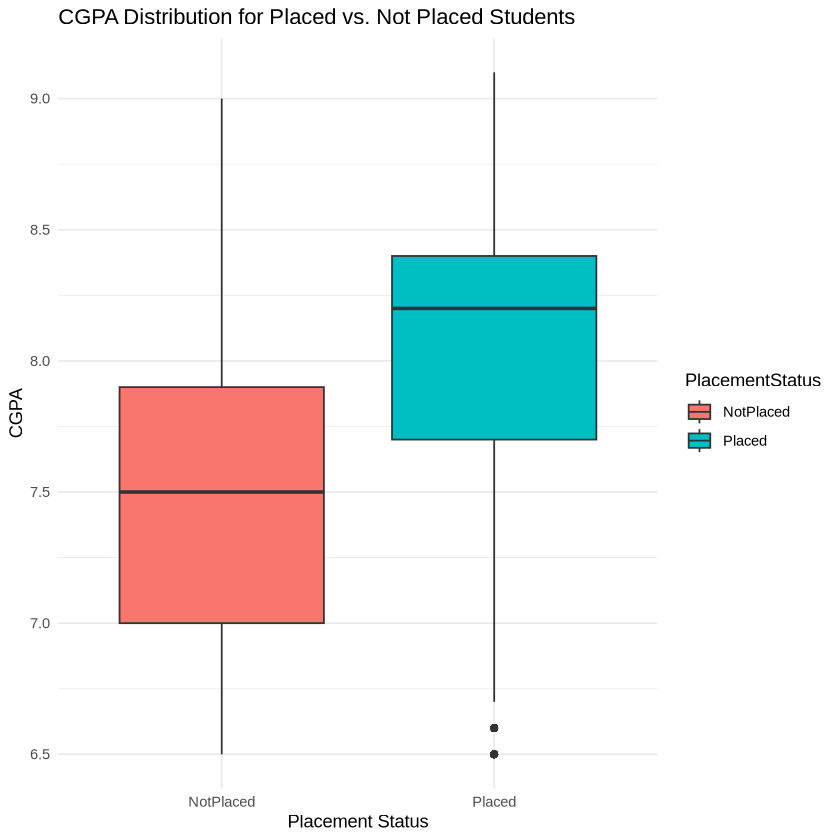

In [60]:
# Create a boxplot to visualize the CGPA distribution based on Placement Status
ggplot(data1, aes(x = PlacementStatus, y = CGPA, fill = PlacementStatus)) +
  
  # Add a boxplot layer to show the distribution of CGPA for each Placement Status
  geom_boxplot() + 
  
  # Add labels for the title and axes
  labs(title = "CGPA Distribution for Placed vs. Not Placed Students",  # Title of the plot
       x = "Placement Status",  # Label for the x-axis
       y = "CGPA") +  # Label for the y-axis
  
  # Apply a minimal theme for a clean, simple design
  theme_minimal()


# Why a BoxPlot  ?

I chose a box plot for CGPA x Placement Status because this helps compare CGPA distributions between placed and non-placed students. This also helps to identify if higher CGPA leads to better placement outcomes.



**1) Placed students have higher CGPAs – The median CGPA of placed students is higher than that of non-placed students. This suggests that students with better grades are more likely to get placed.**

**2) Wider spread in non-placed students – The CGPA range (from minimum to maximum) is larger for non-placed students. This means there is more variation in their CGPAs, whereas placed students tend to have higher and more consistent CGPAs.**

**3) Some outliers – There are a few dots below the lower whisker in the "Placed" category, which means there are some students with relatively low CGPAs who still got placed. However, they could be exceptions.**

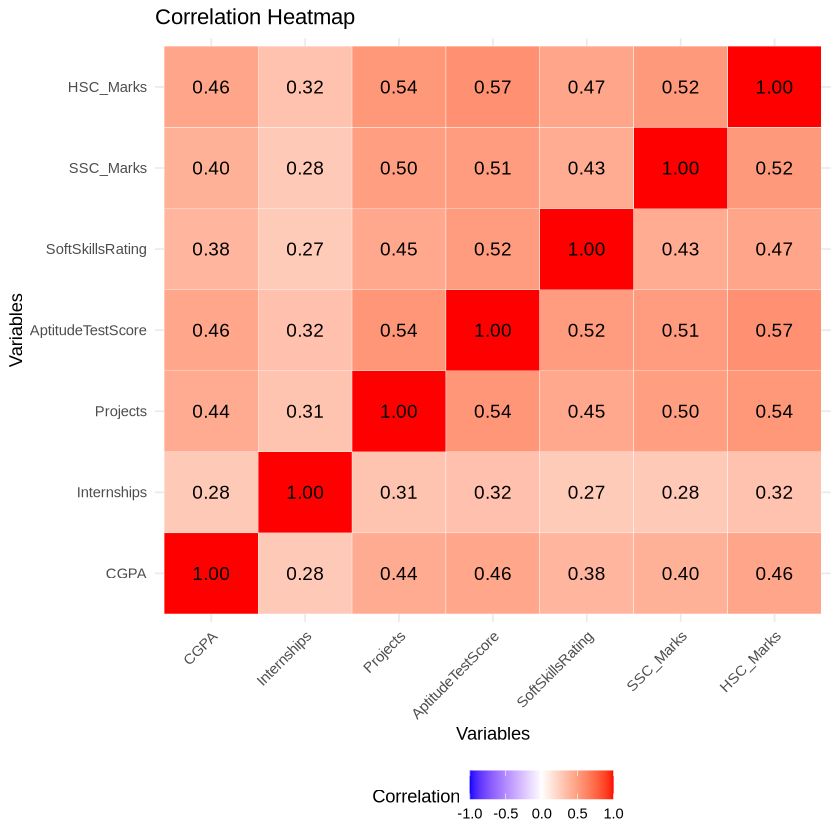

In [61]:
# Calculate the correlation matrix for the numerical variables
cor_matrix <- cor(data1[, c('CGPA', 'Internships', 'Projects', 'AptitudeTestScore', 
                            'SoftSkillsRating', 'SSC_Marks', 'HSC_Marks')])

# Melt the correlation matrix for ggplot
cor_melted <- melt(cor_matrix)

# Plot the heatmap with correlation values inside the tiles
ggplot(cor_melted, aes(Var1, Var2, fill = value)) +
  geom_tile(color = "white") +  # White borders between tiles
  scale_fill_gradient2(low = "blue", high = "red", mid = "white", midpoint = 0, 
                       limit = c(-1, 1), name = "Correlation") +
  geom_text(aes(label = sprintf("%.2f", value)), color = "black", size = 4) +  # Add correlation values
  theme_minimal() +
  labs(title = "Correlation Heatmap", x = "Variables", y = "Variables") +
  theme(axis.text.x = element_text(angle = 45, hjust = 1), 
        axis.text.y = element_text(angle = 0, hjust = 1)) + 
  theme(legend.position = "bottom")


# Interpretation of the Correlation Heatmap:


## Positive Correlations:

1) Higher CGPA is moderately correlated with HSC Marks (0.46) and Aptitude Test Score (0.46).

2) Internships have a weak correlation with CGPA (0.28) and Projects (0.31).

3) Projects and Aptitude Test Score are moderately correlated (0.54), meaning students who perform well on aptitude tests also tend to complete more projects.

## Weaker Correlations:

1) Soft Skills Rating has lower correlations with most variables (~0.3-0.5), meaning it does not strongly impact academic performance metrics.

2) Internships have a weak correlation with other factors, suggesting that securing internships may depend on factors not present in this dataset

## Why Correlation Heat map
- To see which attributes contribute most to CGPA or internship opportunities.
- To analyze how grades, test scores, projects, and internships are interrelated.

# Assignment 2: Methododlogy

* To estimate a student's likelihood of being placed based on their profile, I propose using Logistic Regression, a statistical model designed for binary classification problems. Since the placement status is a categorical variable with two possible outcomes—Placed (Yes) or Not Placed (No)—logistic regression is well-suited for this type of analysis.

* Logistic regression models the probability that a given student will be placed based on independent variables such as CGPA, internships, projects, aptitude test scores, and soft skills rating.
## Why this method?
-Since the placement status is categorical (Yes/No), logistic regression is well-suited for this problem.

-Logistic regression provides coefficients that indicate how each variable influences placement probability, which in turn helps  with inference.

-Probabilistic Predictions: It estimates the probability of a student being placed, allowing for threshold-based classification.

-Baseline Model: As a simple and effective model, logistic regression serves as a strong baseline before exploring more complex methods.

## Assumptions Required
-Logistic regression assumes that predictor variables have a linear relationship with the log-odds of placement.

-Each student's data point should be independent of others.

-Highly correlated independent variables (e.g., SSC Marks and HSC Marks) should be handled to prevent misleading coefficient estimates.

- While logistic regression works well with moderate data, a larger dataset ensures more reliable estimates.


## Potential Limitations or Weaknesses:
-If placement depends on non-linear interactions (e.g., a mix of CGPA, internships, and projects in a non-additive way) then logistic regression may not model these well.

If the dataset has significantly more students placed than not placed or vice versa the  logistic regression may be biased toward the majority class.

# Logistic Model


Call:
glm(formula = PlacementStatus ~ CGPA + Internships + Projects + 
    AptitudeTestScore + SoftSkillsRating, family = binomial, 
    data = trainData)

Coefficients:
                    Estimate Std. Error z value Pr(>|z|)    
(Intercept)       -19.503951   0.535147 -36.446   <2e-16 ***
CGPA                0.741371   0.052651  14.081   <2e-16 ***
Internships         0.101630   0.045115   2.253   0.0243 *  
Projects            0.513584   0.037919  13.544   <2e-16 ***
AptitudeTestScore   0.096920   0.004769  20.322   <2e-16 ***
SoftSkillsRating    1.023405   0.087860  11.648   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 10884.5  on 8000  degrees of freedom
Residual deviance:  7522.3  on 7995  degrees of freedom
AIC: 7534.3

Number of Fisher Scoring iterations: 5


`geom_smooth()` using formula = 'y ~ x'
Warning message in eval(family$initialize):
“non-integer #successes in a binomial glm!”
Warning message in eval(family$initialize):
“non-integer #successes in a binomial glm!”


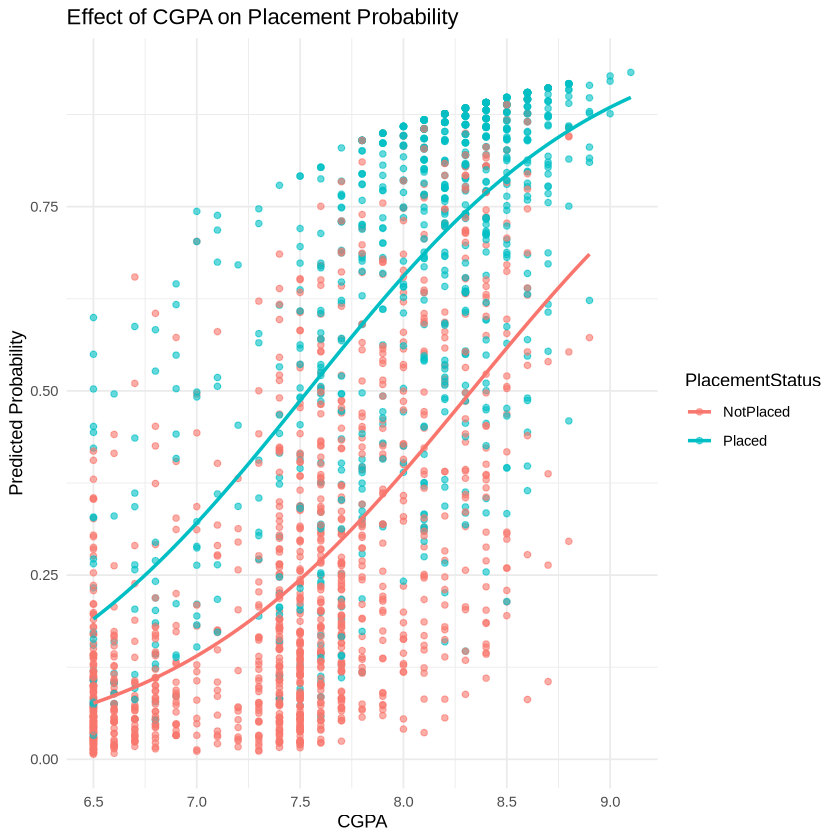

In [62]:


# Convert categorical variables to factors
data1$PlacementStatus <- as.factor(data1$PlacementStatus)
data1$PlacementTraining <- as.factor(data1$PlacementTraining)
data1$ExtracurricularActivities <- as.factor(data1$ExtracurricularActivities)

# Split into training and testing sets
set.seed(123)
trainIndex <- createDataPartition(data1$PlacementStatus, p = 0.8, list = FALSE)
trainData <- data1[trainIndex, ]
testData <- data1[-trainIndex, ]

# Fit logistic regression model
model <- glm(PlacementStatus ~ CGPA + Internships + Projects + AptitudeTestScore + SoftSkillsRating,
             data = trainData, family = binomial)


summary(model)

# Predict probabilities on test data
testData$Predicted_Prob <- predict(model, testData, type = "response")

# Plot: Relationship between CGPA and Placement Probability
ggplot(testData, aes(x = CGPA, y = Predicted_Prob, color = PlacementStatus)) +
  geom_point(alpha = 0.6) +
  geom_smooth(method = "glm", method.args = list(family = "binomial"), se = FALSE) +
  labs(title = "Effect of CGPA on Placement Probability", x = "CGPA", y = "Predicted Probability") +
  theme_minimal()

# What does the model say?

The predicted model plot is relevant because it demonstrates the relationship between CGPA and the probability of placement which helps to identify trends in how academic performance influences hiring decisions. The logistic regression curve highlights the incremental likelihood of placement with higher CGPA values.

The model suggests that CGPA, internships, projects, aptitude test scores, and soft skills rating are statistically significant predictors of placement status, with p-values < 0.05 for all variables. Higher values in these predictors increase the likelihood of placement. The plot shows a clear positive relationship between CGPA and placement probability, where students with a CGPA above 8.0 have a high chance of being placed. However, students with a CGPA below 7.0 have a low placement probability. Despite the strong influence of CGPA, there is some overlap in the placement probabilities, indicating that CGPA alone isn't the sole determining factor. The model fits the data well, as shown by the significant reduction in deviance.

# Is Multicollinearity an issue?


In [64]:
vif(model)

cor(trainData[, c("CGPA", "Internships", "Projects", "AptitudeTestScore", "SoftSkillsRating")])


CGPA       Internships          Projects AptitudeTestScore 
         1.133622          1.091022          1.215589          1.264781 
 SoftSkillsRating 
         1.183715

,CGPA,Internships,Projects,AptitudeTestScore,SoftSkillsRating
CGPA,1.0000000,0.2780241,0.4328428,0.4561740,0.3788996
Internships,0.2780241,1.0000000,0.3020609,0.3203428,0.2709126
Projects,0.4328428,0.3020609,1.0000000,0.5365131,0.4482857
AptitudeTestScore,0.4561740,0.3203428,0.5365131,1.0000000,0.5121867
SoftSkillsRating,0.3788996,0.2709126,0.4482857,0.5121867,1.0000000


## Conclusion on multicollinearity

The correlation matrix shows that none of the predictors have very high pairwise correlations which suggests that multicollinearity is not a major concern. The highest correlation is between Projects and AptitudeTestScore (0.5365), which is moderate but not problematic. Overall,it appears that multicollinearity is not an issue.
